In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/Users/aayushjain/codes/project/Intern_IISC assignments/project 5/Data (1).csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Sex                      200 non-null    int64
 1   Age_category             200 non-null    int64
 2   Highest_education_level  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [4]:
import pandas as pd
import numpy as np
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam
from pyro.nn import ConditionalAutoRegressiveNN
from sklearn.preprocessing import StandardScaler

# Load the original DataFrame (replace 'your_data.csv' with your actual file)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert data to PyTorch tensors
data_tensor = torch.tensor(data_scaled, dtype=torch.float32)

# Define the Normalizing Flow model
def model(data):
    pyro.module("my_model", ConditionalAutoRegressiveNN, input_dim=data.shape[1], hidden_dims=[50, 50])  
    with pyro.plate("data", len(data)):
        pyro.sample("obs", dist.NormalizingFlow(ConditionalAutoRegressiveNN, context=data), obs=data)

# Define a guide (approximate posterior)
def guide(data):
  pyro.module("my_guide", ConditionalAutoRegressiveNN, input_dim=data.shape[1], hidden_dims=[50, 50])

# Setup the SVI (Stochastic Variational Inference) optimizer
optimizer = Adam({"lr": 1e-3})
svi = SVI(model, guide, optimizer, loss=Trace_ELBO())

# Train the model
num_iterations = 1000
for i in range(num_iterations):
  loss = svi.step(data_tensor[i])  # Train on each data point
  if i % 100 == 0:
    print(f"Iteration {i}, Loss = {loss}")

# Generate synthetic samples
# ... (rest of the code for generating synthetic samples remains the same)


# Generate synthetic samples
synthetic_samples = []
with torch.no_grad():
    for _ in range(5000):
        sample = pyro.infer.Predictive(model, guide=guide, num_samples=1)(data_tensor)
        synthetic_samples.append(sample['obs'].squeeze().cpu().numpy())

# Inverse transform the synthetic samples
synthetic_samples = scaler.inverse_transform(synthetic_samples)

# Convert synthetic samples to DataFrame
synthetic_data = pd.DataFrame(synthetic_samples, columns=data.columns)

# Display the synthetic data
print(synthetic_data.head())


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


IndexError: tuple index out of range

In [ ]:
import pandas as pd
import numpy as np
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam
from pyro.nn import ConditionalAutoRegressiveNN
from sklearn.preprocessing import StandardScaler


# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert data to PyTorch tensors
data_tensor = torch.tensor(data_scaled, dtype=torch.float32)

# Define the Normalizing Flow model
def model(data):
    pyro.module("my_model", ConditionalAutoRegressiveNN, input_dim=data.shape[1], hidden_dims=[50, 50])  
    with pyro.plate("data", len(data)):
        pyro.sample("obs", dist.TransformedDistribution(dist.Normal(0., 1.), 
                                                        ConditionalAutoRegressiveNN(data.shape[1], [50, 50])), 
                    obs=data)

# Define a guide (approximate posterior)
def guide(data):
    pyro.module("my_guide", ConditionalAutoRegressiveNN, input_dim=data.shape[1], hidden_dims=[50, 50])

# Setup the SVI (Stochastic Variational Inference) optimizer
optimizer = Adam({"lr": 1e-3})
svi = SVI(model, guide, optimizer, loss=Trace_ELBO())

# Train the model
num_iterations = 1000
for i in range(num_iterations):
    loss = svi.step(data_tensor)  # Train on all data points
    if i % 100 == 0:
        print(f"Iteration {i}, Loss = {loss}")

# Generate synthetic samples
synthetic_samples = []
with torch.no_grad():
    for _ in range(5000):
        sample = pyro.infer.Predictive(model, guide=guide, num_samples=1)(data_tensor)
        synthetic_samples.append(sample['obs'].squeeze().cpu().numpy())

# Inverse transform the synthetic samples
synthetic_samples = scaler.inverse_transform(synthetic_samples)

# Convert synthetic samples to DataFrame
synthetic_data = pd.DataFrame(synthetic_samples, columns=data.columns)

# Display the synthetic data
print(synthetic_data.head())


TypeError: module() got an unexpected keyword argument 'input_dim'

In [ ]:
data= pd.read_csv("/Users/aayushjain/codes/project/Intern_IISC assignments/project 5/Data (1).csv")

In [ ]:
data.head()

,Sex,Age_category,Highest_education_level
0,2,2,2
1,1,2,3
2,2,1,2
3,2,2,3
4,1,2,2


In [14]:
# Assuming 'data' is your DataFrame
data['concatenated'] = data.apply(lambda row: ''.join(map(str, row[['Sex', 'Age_category', 'Highest_education_level']])), axis=1)


In [ ]:
data['concatenated'].nunique()

20

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sex                      200 non-null    int64 
 1   Age_category             200 non-null    int64 
 2   Highest_education_level  200 non-null    int64 
 3   concatenated             200 non-null    object
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Assuming you have your original dataset stored in a DataFrame called 'data'
# with columns 'Sex', 'Age_category', and 'Highest_education_level'

# Step 1: Cluster the data based on combinations of the three columns
X = data[['Sex', 'Age_category', 'Highest_education_level']].values
kmeans = KMeans(n_clusters=24, random_state=42)  # 24 clusters for 24 unique combinations
data['cluster'] = kmeans.fit_predict(X)

# Step 2: Generate synthetic data within each cluster
synthetic_data = pd.DataFrame(columns=['Sex', 'Age_category', 'Highest_education_level'])

for cluster_id, group in data.groupby('cluster'):
    # Assuming you have approximately 200 rows of data within each cluster
    num_samples = 5000 // 24  # Adjusted based on the desired final dataset size
    synthetic_samples = group.sample(n=num_samples, replace=True)
    synthetic_data = pd.concat([synthetic_data, synthetic_samples])

# Step 3: Interpolate with Correlation and Ratio
# Assuming you have correlation information available
# For simplicity, let's assume you have a correlation matrix 'corr_matrix'

# Example correlation matrix
corr_matrix = data[['Sex', 'Age_category', 'Highest_education_level']].corr()

# Adjust synthetic data based on correlation
synthetic_data_corr_adjusted = synthetic_data.copy()
synthetic_data_corr_adjusted[['Sex', 'Age_category', 'Highest_education_level']] = \
    synthetic_data_corr_adjusted[['Sex', 'Age_category', 'Highest_education_level']].dot(np.linalg.cholesky(corr_matrix).T)

# Step 4: Calculate mean or median for columns 2 and 3 in each cluster
# Let's assume you want to use the mean
scaling_factors = data.groupby('cluster')[['Age_category', 'Highest_education_level']].mean().reset_index()

# Merge scaling factors with synthetic data
synthetic_data_final = synthetic_data_corr_adjusted.merge(scaling_factors, on='cluster', how='left')

# Optionally, shuffle the final dataset
# synthetic_data_final = synthetic_data_final.sample(frac=1).reset_index(drop=True)


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (20) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [ ]:
synthetic_data_final

,Sex,Age_category_x,Highest_education_level_x,concatenated,cluster,Age_category_y,Highest_education_level_y
0,1.0,0.983956,0.169013,110,0.0,1.0,0.0
1,1.0,0.983956,0.169013,110,0.0,1.0,0.0
2,1.0,0.983956,0.169013,110,0.0,1.0,0.0
3,1.0,0.983956,0.169013,110,0.0,1.0,0.0
4,1.0,0.983956,0.169013,110,0.0,1.0,0.0
...,...,...,...,...,...,...,...
4155,1.0,1.98383,2.344693,122,21.0,2.0,2.0
4156,1.0,1.98383,2.344693,122,21.0,2.0,2.0
4157,1.0,1.98383,2.344693,122,21.0,2.0,2.0
4158,1.0,1.98383,2.344693,122,21.0,2.0,2.0


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


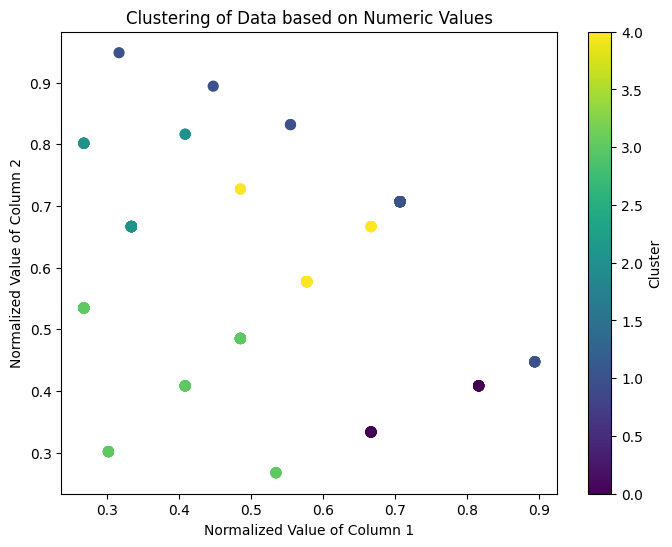

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

feature_vector = data[['Sex', 'Age_category', 'Highest_education_level']].values

normalized_feature_vector = feature_vector / np.linalg.norm(feature_vector, axis=1, keepdims=True)

kmeans = KMeans(n_clusters=5)  
clusters = kmeans.fit_predict(normalized_feature_vector)

plt.figure(figsize=(8, 6))
plt.scatter(normalized_feature_vector[:, 0], normalized_feature_vector[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('Normalized Value of Column 1')
plt.ylabel('Normalized Value of Column 2')
plt.title('Clustering of Data based on Numeric Values')
plt.colorbar(label='Cluster')
plt.show()


In [11]:
normalized_feature_vector.shape

(200, 3)

In [12]:
len(clusters)

200

In [15]:
data['concatenated'].unique()

array(['222', '123', '212', '223', '122', '211', '113', '132', '230',
       '220', '110', '112', '111', '221', '232', '210', '130', '121',
       '213', '120'], dtype=object)

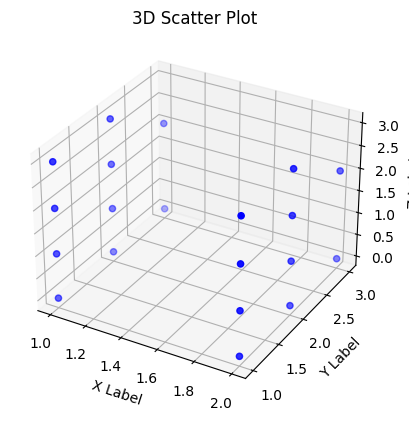

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the coordinates
coordinates = ['222', '123', '212', '223', '122', '211', '113', '132', '230',
               '220', '110', '112', '111', '221', '232', '210', '130', '121',
               '213', '120']

# Convert coordinates to numeric values
x = np.array([int(coord[0]) for coord in coordinates])
y = np.array([int(coord[1]) for coord in coordinates])
z = np.array([int(coord[2]) for coord in coordinates])

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, c='b', marker='o')

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

# Show plot
plt.show()


In [18]:
data.groupby('concatenated').nunique()

,Sex,Age_category,Highest_education_level
concatenated,,,
110,1,1,1
111,1,1,1
112,1,1,1
113,1,1,1
120,1,1,1
121,1,1,1
122,1,1,1
123,1,1,1
130,1,1,1


In [37]:
data['concatenated'].value_counts()

concatenated
122    40
222    26
223    18
123    16
110    13
212    13
211    11
112    11
220     9
111     7
113     6
132     6
221     6
210     6
213     4
230     2
232     2
121     2
130     1
120     1
Name: count, dtype: int64

In [27]:
import pandas as pd
import numpy as np

# Given concatenated data and count
concatenated_data = {
    'concatenated': ['122', '222', '223', '123', '110', '212', '211', '112', '220', 
                     '111', '113', '132', '221', '210', '213', '230', '232', '121', 
                     '130', '120'],
    'count': [10000, 6500, 4500, 4000, 3250, 3250, 2750, 2750, 2250, 
              1750, 1500, 1500, 1500, 1500, 1000, 500, 500, 500, 250, 250]
}

# Create DataFrame from concatenated data
df_concatenated = pd.DataFrame(concatenated_data)

# Repeat each value in 'concatenated' column according to 'count'
concatenated_values = np.repeat(df_concatenated['concatenated'], df_concatenated['count'])

# Expand concatenated values to match the desired length of 50000
expanded_concatenated_values = np.tile(concatenated_values, int(50000 / len(concatenated_values)) + 1)

# Create DataFrame with desired length of 50000
df_final = pd.DataFrame({'concatenated': expanded_concatenated_values})

# Take the first 50000 rows to get the desired number of values
df_final = df_final.head(50000)

print(df_final)


      concatenated
0              122
1              122
2              122
3              122
4              122
...            ...
49995          120
49996          120
49997          120
49998          120
49999          120

[50000 rows x 1 columns]


In [38]:
df_final.value_counts()

concatenated
122             10000
222              6500
223              4500
123              4000
110              3250
212              3250
211              2750
112              2750
220              2250
111              1750
221              1500
210              1500
132              1500
113              1500
213              1000
121               500
230               500
232               500
130               250
120               250
Name: count, dtype: int64

In [28]:
df_final['concatenated'].unique()

array(['122', '222', '223', '123', '110', '212', '211', '112', '220',
       '111', '113', '132', '221', '210', '213', '230', '232', '121',
       '130', '120'], dtype=object)

In [30]:
def extract_values(concatenated_column):
    # Assuming the concatenated column is named 'concatenated'
    # Split the concatenated string into individual values
    values = concatenated_column.str.findall(r'.{1}').apply(lambda x: pd.Series(x))
    
    # Rename the columns to match the original columns
    values.columns = ['Sex', 'Age_category', 'Highest_education_level']
    
    return values

extracted_values = extract_values(df_final['concatenated'])

# Now 'extracted_values' contains the original values of the columns 'Sex', 'Age_category', and 'Highest_education_level'
print(extracted_values)


      Sex Age_category Highest_education_level
0       1            2                       2
1       1            2                       2
2       1            2                       2
3       1            2                       2
4       1            2                       2
...    ..          ...                     ...
49995   1            2                       0
49996   1            2                       0
49997   1            2                       0
49998   1            2                       0
49999   1            2                       0

[50000 rows x 3 columns]


In [34]:
extracted_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sex                      50000 non-null  object
 1   Age_category             50000 non-null  object
 2   Highest_education_level  50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


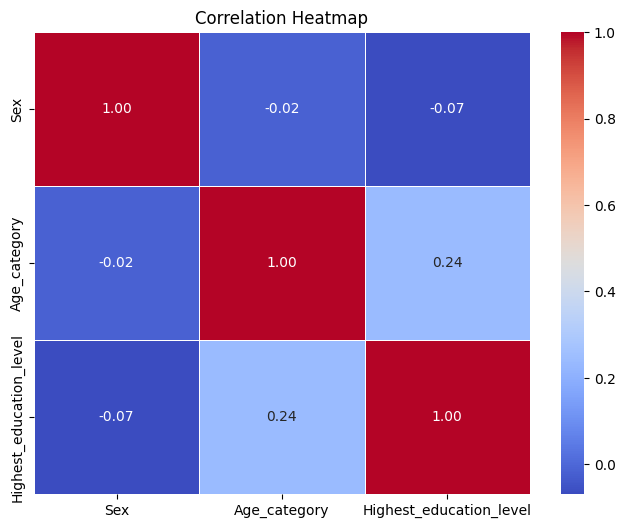

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'extracted_values' is your DataFrame containing the extracted values
# Calculate the correlation matrix
correlation_matrix = extracted_values.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [39]:
df_final.value_counts()

concatenated
122             10000
222              6500
223              4500
123              4000
110              3250
212              3250
211              2750
112              2750
220              2250
111              1750
221              1500
210              1500
132              1500
113              1500
213              1000
121               500
230               500
232               500
130               250
120               250
Name: count, dtype: int64

In [40]:
data_obt=df_final.value_counts()

In [42]:
data_obt.head()

concatenated
122             10000
222              6500
223              4500
123              4000
110              3250
Name: count, dtype: int64